## data set：
https://www.kaggle.com/datasets/jadenqee/comments-dataset-about-earphones-chinese

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

params = {
    "font.sans-serif":"Simhei",
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "figure.figsize": (10, 8),
    "figure.dpi":500,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "figure.titlesize": 22,
    "axes.unicode_minus": False
}
plt.rcParams.update(params)

In [12]:
data=pd.read_csv('C:\\Users\\86180\\Desktop\\PBL-2023\\project\\NLP-review\\erji_sentiments_v2.csv')
data.head()

,Unnamed: 0,content_id,content,subject,sentiment_word,sentiment_value
0,0,0,Silent Angel期待您的光临，共赏美好的声音！,音质,好,1
1,1,1,这只HD650在1k的失真左声道是右声道的6倍左右，也超出官方规格参数范围（0.05%），看...,配置,失真,-1
2,2,2,达音科 17周年 倒是数据最好看，而且便宜,配置,好,1
3,3,3,bose，beats，apple的消費者根本不知道有曲線的存在,其他,NaN,0
4,4,4,不错的数据,配置,不错,1


### 看起来这已经处理好了，我们用自己的方法再处理一遍

## 1.Data-preprocessing

In [13]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [14]:
data.rename(columns = {'content_id':'ID'}, inplace = True)
data.head()

,ID,content,subject,sentiment_word,sentiment_value
0,0,Silent Angel期待您的光临，共赏美好的声音！,音质,好,1
1,1,这只HD650在1k的失真左声道是右声道的6倍左右，也超出官方规格参数范围（0.05%），看...,配置,失真,-1
2,2,达音科 17周年 倒是数据最好看，而且便宜,配置,好,1
3,3,bose，beats，apple的消費者根本不知道有曲線的存在,其他,NaN,0
4,4,不错的数据,配置,不错,1


In [15]:
comments=data['content']
print(len(comments))

17176


#### 数据不存在空缺值

In [19]:
comments.isna().value_counts()

False    17176
Name: content, dtype: int64

In [26]:
comments.value_counts().shape
# 有重复值

(16883,)

In [24]:
#comments.value_counts()返回的是series
comments.value_counts()[:25]
# 16883 

学习了                                                         14
........................................................    11
学习了。                                                        11
占楼                                                          10
帮顶                                                          10
[s:2]                                                        8
顶顶                                                           8
[s:52]                                                       7
顶起                                                           7
占楼，待编辑                                                       6
太富了                                                          4
50包邮                                                         4
帮顶一下                                                         4
学习一下                                                         4
hd600                                                        4
新年快乐！                                                  

#### 去除重复值

In [27]:
content_dup = comments.drop_duplicates()
print('去除重复值后的大小',len(content_dup))

去除重复值后的大小 16883


### 1.1 正则表达式去除非中文＆停用词

In [28]:
content_dup[0]

'Silent Angel期待您的光临，共赏美好的声音！'

In [29]:
# 对评论内容做清洗
import re #正则表达式(文本处理必备)
re.sub('，| |[0-9a-zA-Z]|（|）|\.|-|\\\\','',content_dup[0])#处理一条评论数据

'期待您的光临共赏美好的声音！'

In [30]:
# 处理所有的评论数据:根据分析需要,将部分字符踢出,需要人工筛选,工作量相对较大
# 有未剔除的部分,在后续去除停用词的时候仍可继续剔除
content_dup.apply(lambda x:re.sub('，| |[0-9a-zA-Z]|（|）|\.|-|\\\\|&|;','',str(x)))

0                            期待您的光临共赏美好的声音！
1        这只在的失真左声道是右声道的倍左右也超出官方规格参数范围%看来是坏了
2                          达音科周年倒是数据最好看而且便宜
3                           的消費者根本不知道有曲線的存在
4                                     不错的数据
                        ...                
17171                           价位推有比更好的耳放么
17172                        爆皮正常换根线就没这种忧虑了
17173            自己焊接一下就行了话说我原线全新原线新放盒子里没动了
17174                          所以趁着还没爆赶紧出手。
17175                      黑参考自己两米线成本左右吊打原线
Name: content, Length: 16883, dtype: object

In [31]:
#只保留中文部分
re.sub('[^\u4e00-\u9fa5]','',content_dup[0])#^转意符
content_clean = content_dup.apply(lambda x:re.sub('[^\u4e00-\u9fa5]','',str(x)))

### 1.2 jieba库分词

In [32]:
import jieba
from wordcloud import WordCloud

In [33]:
#分词
print(content_clean[0])
#未导入自定义dic的分词效果
jieba.lcut(content_clean[0])

Building prefix dict from the default dictionary ...


期待您的光临共赏美好的声音


Dumping model to file cache C:\Users\86180\AppData\Local\Temp\jieba.cache
Loading model cost 0.728 seconds.
Prefix dict has been built successfully.


['期待', '您', '的', '光临', '共赏', '美好', '的', '声音']

In [34]:
#导入自定义词典的分词效果
jieba.load_userdict('./newdict.txt')
jieba.lcut(content_clean[0]) #自定义词典对分词结果影响很大

['期待', '您', '的', '光临', '共赏', '美好', '的', '声音']

In [35]:
# 批量处理分词
content_cut = content_clean.apply(lambda x:jieba.lcut(str(x)))

### 1.3词频统计

In [43]:
from tkinter import _flatten
# 分词后的词频统计
cut_word = pd.Series(_flatten(list(content_cut))).value_counts()
cut_word

的      13942
了       5682
是       4633
我       2998
也       2307
       ...  
露          1
孩纸们        1
桑不起        1
日用品        1
两米         1
Length: 20833, dtype: int64

In [37]:
# 去除停用词
# 读取停用词表
with open('./stoplist.txt',encoding='UTF-8') as f:
    stop = f.readlines()
#规范停用词格式
stop = [str(i).split('\n')[0] for i in stop]
# 删除停用词
content_stop = content_cut.apply(lambda x:[i for i in x if i not in stop])

In [45]:
content_stop[:50]

0                                  [期待, 光临, 共赏, 美好, 声音]
1                  [失真, 左声道, 右声道, 倍, 超出, 官方, 规格, 参数, 坏]
2                              [达音科, 周年, 倒, 数据, 好看, 便宜]
3                                            [消費者, 有曲線]
4                                              [不错, 数据]
5         [任何人, 高端, 耳机, 之间, 区别, 不用, 出声, 佩戴, 感不, 没法, 盲听]
6                                     [听, 区别, 听, 层次, 高]
7                      [有没有, 人能, 从条, 电源线, 里, 听, 最贵, 哪条]
8                                     [二级, 银, 耳朵, 对号入座]
9     [一般来说, 发烧友, 起步, 铜, 耳朵, 级别, 达, 不到, 就别, 浪费, 钱, 入...
10                [器材, 级别, 搭配, 听, 线材, 区别, 一件, 非常容易, 事情]
11                                             [不知, 级别]
12                                  [自我, 定位, 算个, 铜, 耳朵]
13                             [分辩, 水电, 火电, 核电, 分辨, 耳朵]
14                               [一级, 银, 耳朵, 顶天, 无损, 听]
15                                             [银耳, 飘过]
16                     [测试, 希望, 论坛, 帖子, 回复, 提醒, 功能, 整合]
17                          [网页, 手机, 版, 退到, 一层, 

In [39]:
# 对去除停用词后的数据做词频统计
stop_word = pd.Series(_flatten(list(content_stop))).value_counts()

### 1.4 wordcloud可视化词云

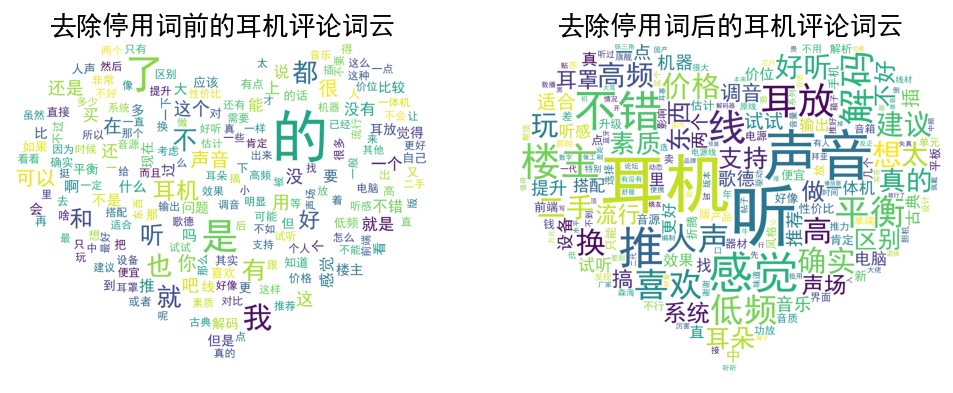

In [61]:
# 可视化
from wordcloud import WordCloud
p=plt.figure(dpi=120) #调整像素
mask = plt.imread('./base_heart.jpg')
#构建图形
wc = WordCloud(font_path='C:\Windows\Fonts\simhei.ttf',#设置字体保证中文正常显示
               background_color='white',#设置背景颜色
               mask=mask,#设置背景图像
               max_words=200)
ax1 = p.add_subplot(1,2,1)
wc.fit_words(cut_word)#插入词频统计结果(没去停用词)
plt.imshow(wc)
plt.title('去除停用词前的耳机评论词云')
plt.axis('off')
ax2 = p.add_subplot(1,2,2)
wc.fit_words(stop_word)#插入词频统计结果(去除停用词)
plt.imshow(wc)
plt.title('去除停用词后的耳机评论词云')
plt.axis('off')
plt.savefig('./wordcloud.png',dpi=1500)#保存图片
plt.show()

## 2. sentiment analysis
#### note that这个时候又考虑把非中文的加进来了）
### 2.1 导入情感词表

In [42]:
#导入情感词表
feeling = pd.read_csv('./BosonNLP_sentiment_score.txt'
                      ,sep=' ',header=None)
feeling.columns = ['word','score']
feeling.head()

,word,score
0,最尼玛,-6.704000
1,扰民,-6.497564
2,fuck...,-6.329634
3,RNM,-6.218613
4,wcnmlgb,-5.967100


In [47]:
pos = feeling[feeling['score']>0] #积极情感词
neg = feeling[feeling['score']<0] #消极情感词
print(len(pos))
print(len(neg))
sum(feeling['score']==0)
# 没有中立的

83085
31681


0

### 2.2 计算数据的情感得分

In [48]:
content_stop.index = range(len(content_stop)) #重置index
#计算第一行评论数据的情感得分
feel = list(feeling['word'])
feel

['最尼玛',
 '扰民',
 'fuck...',
 'RNM',
 'wcnmlgb',
 '2.5:',
 'Fxxk',
 'MLP',
 '吃哑巴亏',
 'IAQI',
 'MLGBD',
 'NNND',
 'MLGB.',
 '成甘',
 '最桑',
 '真无语',
 'ＴＭ',
 '次奥次奥次奥',
 'cnmd',
 'MBD',
 'NNDX',
 '水蛭',
 '美素丽',
 '草尼',
 '凌迟',
 '尼玛尼玛尼玛',
 '冠周炎',
 '加塞儿',
 '日尼玛',
 '朝仲',
 'MD...',
 'shit....',
 '人清',
 '风疹块',
 'ＴＭＤ',
 '真桑心',
 'NND...',
 '延机',
 '毛明天',
 '逆流',
 '肺病',
 '5555ACCOUNT_',
 'NTR',
 'Shit.',
 'nnd.',
 '化学药品',
 '章珊珊',
 '桑心桑',
 'mbd',
 '尼玛让',
 '重启后',
 '太桑',
 'mlgbd',
 'DIU',
 'mmmp',
 'no....',
 'ohshit',
 'tmd.',
 '让不让',
 '肠痉挛',
 '欺人太甚',
 '13803883303',
 'Crixus',
 'NDYD',
 'TouchTao',
 'fxxking',
 'no..',
 '求淡定',
 '电子电路',
 '费爱华',
 '路雪旗',
 '甘嘎',
 'MLGB...',
 'NNd',
 'QNMLGBD',
 'TMd',
 'mlp',
 '先好',
 '半仲',
 '拉普拉斯',
 '梗阻',
 '欧尼玛',
 '解又',
 '解成',
 '遗忘症',
 '马丹',
 '毛为毛',
 '40.2',
 '55555......',
 '555555555555555555',
 '@／',
 'MLGBZ',
 'NNDACCOUNT_',
 'O33',
 'SOB',
 'Upset',
 '二三十分',
 '先黎',
 '吐尼玛',
 '善宇',
 '回天无力',
 '忴',
 '正爽',
 '趾头',
 '醒仲',
 'fuckfuckfuck',
 '么劲',
 '桑心好',
 '55555555555',
 '尼玛阿',
 '下

In [49]:
# 自定义计算情感分数函数
def classfi(list1):
    sumscore=0; #基础分0
    for i in list1:
        if i in feel:
            sumscore+=feeling['score'][feel.index(i)]
    return sumscore

In [52]:
print(content_stop[0])
classfi(content_stop[0])

['期待', '光临', '共赏', '美好', '声音']


7.002700897202001

In [53]:
#计算评论的情感得分
ind = content_stop.apply(lambda x:classfi(x))
ind

0        7.002701
1        3.139752
2        2.689406
3        0.000000
4        1.602129
           ...   
16878    1.335915
16879   -0.217157
16880    3.213789
16881    0.311974
16882   -0.136003
Name: content, Length: 16883, dtype: float64

In [67]:
# 存储感情分数
data['score']=ind
data.to_csv('.\earphones_sentiments.csv')

In [56]:
#分别提取正向和逆向数据
positive = content_stop[ind > 0]
negative = content_stop[ind <= 0]
pos_word = pd.Series(_flatten(list(positive))).value_counts()
neg_word = pd.Series(_flatten(list(negative))).value_counts()
print('positive:',len(pos_word))
print('negative:',len(neg_word))

positive: 15299
negative: 9653


### 2.3 画出正负向的词云

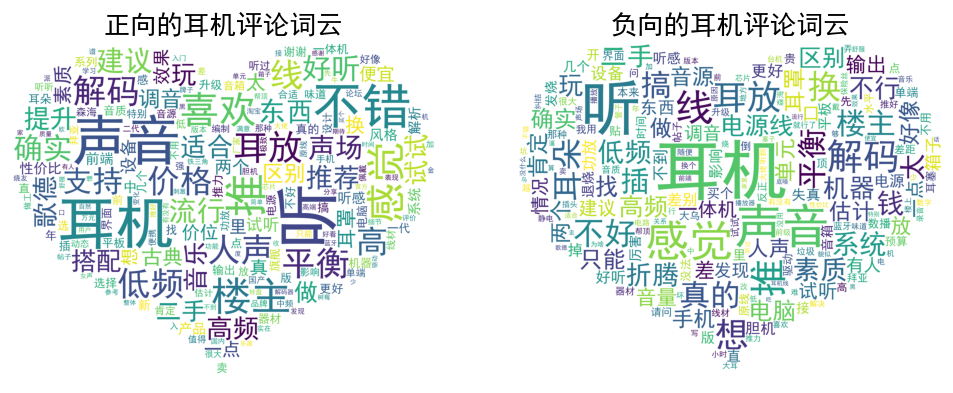

In [60]:
p = plt.figure(dpi=120) # 调整图片像素
mask = plt.imread('./base_heart.jpg')
#构建图形
wc = WordCloud(font_path='C:\Windows\Fonts\simhei.ttf',#设置字体保证中文正常显示
               background_color='white',#设置背景颜色
               mask=mask,#设置背景图像
               max_words=200)
ax1 = p.add_subplot(1,2,1)
wc.fit_words(pos_word)#插入正向词频统计
plt.imshow(wc)
plt.title('正向的耳机评论词云')
plt.axis('off')
ax2 = p.add_subplot(1,2,2)
wc.fit_words(neg_word)#插入负向词频统计
plt.imshow(wc)
plt.title('负向的耳机评论词云')
plt.axis('off')
plt.savefig('./正负向的词云.png',dpi=1500)#保存图片
plt.show()

### 2.4 主题提取

### 2.4.1构建模型
#### Gensim: Topic modelling for humans
* 语料（Corpus）：一组原始文本的集合，用于无监督地训练文本主题的隐层结构。语料中不需要人工标注的附加信息。在Gensim中，Corpus通常是一个可迭代的对象（比如列表）。每一次迭代返回一个可用于表达文本对象的稀疏向量。
* 向量（Vector）：由一组文本特征构成的列表。是一段文本在Gensim中的内部表达。
* 稀疏向量（SparseVector）：通常，我们可以略去向量中多余的0元素。此时，向量中的每一个元素是一个(key, value)的元组
* 模型（Model）：是一个抽象的术语。定义了两个向量空间的变换（即从文本的一种向量表达变换为另一种向量表达）
####  Gensim内置了多种主题模型的向量变换，包括LDA，LSI，RP，HDP等。这些模型通常以bow向量或tfidf向量的语料为输入，生成相应的主题向量。

In [62]:
from gensim import corpora
from gensim import models
#先处理积极的
#构建词典（积极的词典）
pos_dict = corpora.Dictionary(positive)
#构建词向量，建立语料库（文本数据---->结构化数据转化）
# 对应着词袋模型的doc2bow变换
pos_corpus = [pos_dict.doc2bow(i) for i in positive]
#构建模型
pos_lda = models.LdaModel(pos_corpus,num_topics=3,id2word=pos_dict)
#输出主题
pos_lda.print_topics()

[(0,
  '0.026*"听" + 0.014*"声音" + 0.011*"耳机" + 0.009*"不错" + 0.007*"感觉" + 0.006*"确实" + 0.006*"建议" + 0.006*"人声" + 0.005*"线" + 0.005*"适合"'),
 (1,
  '0.008*"听" + 0.007*"耳机" + 0.007*"好听" + 0.006*"真" + 0.005*"低频" + 0.005*"二手" + 0.004*"性价比" + 0.004*"音乐" + 0.004*"追求" + 0.004*"声音"'),
 (2,
  '0.017*"耳机" + 0.013*"楼主" + 0.012*"不错" + 0.011*"推" + 0.010*"价格" + 0.008*"声音" + 0.008*"支持" + 0.007*"推荐" + 0.006*"喜欢" + 0.005*"高"')]

In [63]:
#再处理消极的
#构建词典（消极的词典）
neg_dict = corpora.Dictionary(negative)
#构建词向量，建立自己的字典neg_dict（文本数据---->结构化数据转化）
neg_corpus = [neg_dict.doc2bow(i) for i in negative]
#构建模型
neg_lda = models.LdaModel(neg_corpus,num_topics=3,id2word=neg_dict)
#输出主题
neg_lda.print_topics()

[(0,
  '0.016*"听" + 0.010*"平衡" + 0.008*"推" + 0.008*"耳放" + 0.007*"耳机" + 0.007*"二手" + 0.006*"感觉" + 0.006*"想" + 0.005*"手机" + 0.005*"输出"'),
 (1,
  '0.018*"耳机" + 0.013*"声音" + 0.011*"听" + 0.011*"解码" + 0.009*"线" + 0.007*"楼主" + 0.007*"耳朵" + 0.005*"感觉" + 0.005*"耳放" + 0.004*"一体机"'),
 (2,
  '0.021*"耳机" + 0.018*"听" + 0.007*"声音" + 0.007*"感觉" + 0.007*"不好" + 0.005*"想" + 0.005*"搞" + 0.005*"线" + 0.004*"真的" + 0.004*"试听"')]

In [68]:
type(neg_lda)

gensim.models.ldamodel.LdaModel

### 2.4.2主题可视化

In [73]:
!pip install pyldavis

  Using cached pyLDAvis-3.4.0-py3-none-any.whl (2.6 MB)


In [76]:
import pyLDAvis.gensim

pos_dict = corpora.Dictionary(positive)
pos_corpus = [pos_dict.doc2bow(i) for i in positive]
pos_lda = models.LdaModel(pos_corpus,num_topics=3,id2word=pos_dict)

d=pyLDAvis.gensim.prepare(pos_lda,pos_corpus,pos_dict)

'''
lda: 计算好的话题模型

corpus: 文档词频矩阵

dictionary: 词语空间
'''

#pyLDAvis.show(d)#展示在浏览器
#pyLDAvis.displace(d) #展示在notebook的output cell中

OSError: [Errno 22] Invalid argument: 'https://cdn.jsdelivr.net/gh/bmabey/pyLDAvis@3.4.0/pyLDAvis/js/ldavis.v1.0.0.css'

In [77]:
def save_visual(lda,corpus,id2word,name):
    #保存为HTML
    d=pyLDAvis.gensim.prepare(lda, corpus, id2word)
    pyLDAvis.save_html(d, name+'.html')#可视化
save_visual(pos_lda,pos_corpus,pos_dict,'正向主题可视化')

In [78]:
save_visual(neg_lda,neg_corpus,neg_dict,'负向主题可视化')